# COVID-19 Exploratory Data Analysis and prediction using Machine Learning (ARIMA Model, Linear Regression, Polynomial Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [5]:
data = pd.read_csv('data_set/covid_19_data.csv', index_col='SNo')

In [6]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
data.shape

(116805, 7)

In [8]:
data.isnull().sum()

ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

###### There is no need to drop null values here as we will be doing countrywise analysis and not by province/state wise. 

In [10]:
data.describe()

,Confirmed,Deaths,Recovered
count,1.168050e+05,116805.000000,1.168050e+05
mean,1.908217e+04,777.745473,1.117002e+04
std,5.825465e+04,2859.184068,6.258701e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,2.450000e+02,3.000000,4.000000e+00
50%,2.148000e+03,42.000000,4.260000e+02
75%,1.037400e+04,331.000000,3.829000e+03
max,1.242770e+06,42072.000000,2.670256e+06


In [11]:
data.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

###### we need to convert observation date into datetime format.

In [12]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [13]:
data.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

###### Applying Machine Learning ond world Data

In [20]:
data_world = pd.DataFrame(data=data)

In [23]:
data_world.set_index('ObservationDate', drop=True, inplace=True)

In [25]:
data_world.drop(columns=['Province/State', 'Country/Region', 'Last Update'], inplace=True)

In [33]:
data_world = data_world.groupby('ObservationDate').agg({'Confirmed':'sum','Recovered':'sum','Deaths':'sum'})

In [34]:
data_world_diff = data_world.diff(periods=1).fillna(0)

In [35]:
data_world_diff.head(10)

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,0.0,0.0,0.0
2020-01-23,98.0,2.0,1.0
2020-01-24,288.0,6.0,8.0
2020-01-25,497.0,3.0,16.0
2020-01-26,680.0,13.0,14.0
2020-01-27,809.0,9.0,26.0
2020-01-28,2651.0,46.0,49.0
2020-01-29,587.0,19.0,2.0
2020-01-30,2070.0,17.0,38.0


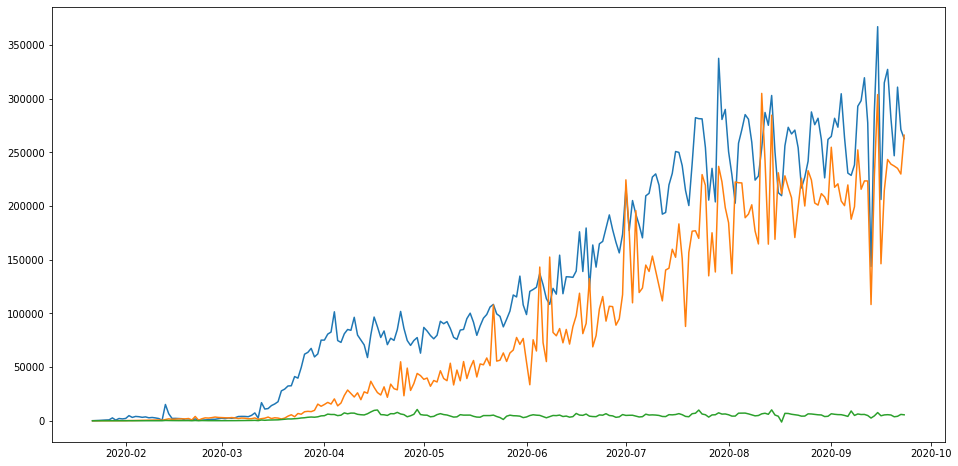

In [44]:
plt.figure(figsize=(16,8))
plt.plot(data_world_diff);

###### Here we can see that the trend is not stationary.Hence, first we will need to make it stationary

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

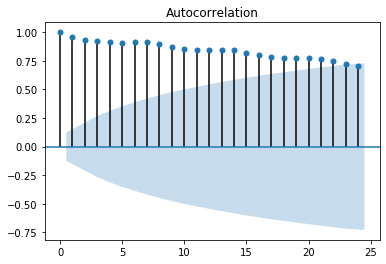

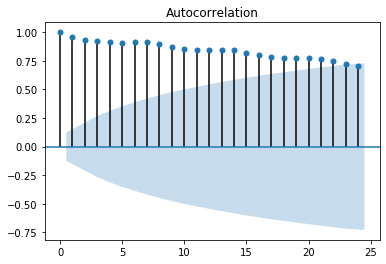

In [52]:
plot_acf(data_world_diff['Confirmed'])

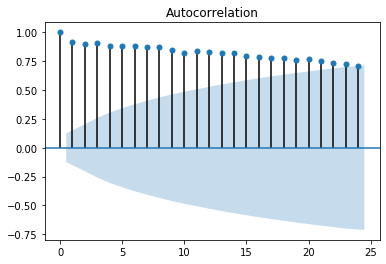

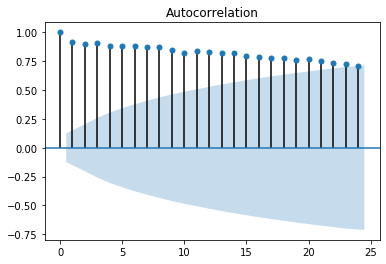

In [53]:
plot_acf(data_world_diff['Recovered'])

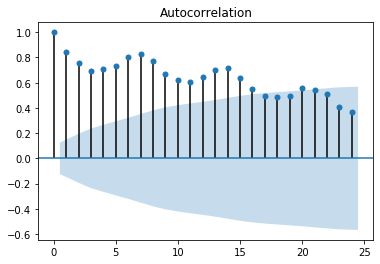

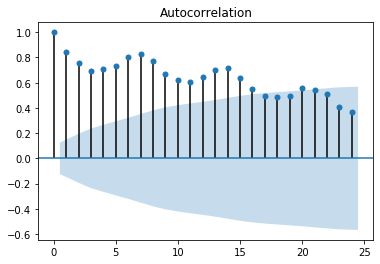

In [54]:
plot_acf(data_world_diff['Deaths'])

In [55]:
data_world_diff_1 = data_world_diff.shift(1)

In [56]:
data_world_diff_1

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0
2020-01-24,98.0,2.0,1.0
2020-01-25,288.0,6.0,8.0
2020-01-26,497.0,3.0,16.0
...,...,...,...
2020-09-19,327308.0,243397.0,5633.0
2020-09-20,281953.0,239079.0,5346.0
2020-09-21,246861.0,237270.0,3699.0


In [57]:
data_world_diff_1 = data_world_diff_1.diff(1)

In [58]:
data_world_diff_1

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN
2020-01-24,98.0,2.0,1.0
2020-01-25,190.0,4.0,7.0
2020-01-26,209.0,-3.0,8.0
...,...,...,...
2020-09-19,12474.0,28903.0,219.0
2020-09-20,-45355.0,-4318.0,-287.0
2020-09-21,-35092.0,-1809.0,-1647.0


In [61]:
data_world_diff_1 = data_world_diff_1[2:]

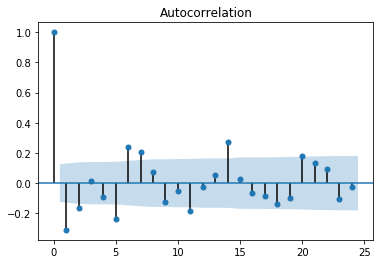

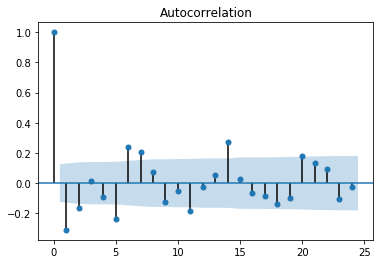

In [62]:
plot_acf(data_world_diff_1['Confirmed'])

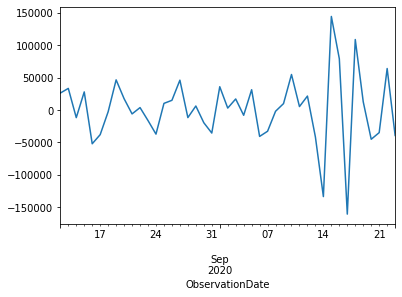

In [69]:
data_world_diff_1['Confirmed'][200:].plot()

In [66]:
data_world_diff_1['Confirmed'].shape

(243,)